<a href="https://colab.research.google.com/github/andrewlee-29/Applied_Deep_Learning_2023Summer/blob/main/Week5_hw2(Regression)_CA_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

print(X_train.shape)

(11610, 8)


Create a FUNCTIONAL model. Set:

- final layer
- loss
- optimizer
- metrics

See sample code at the bottom for:
- performance on X_test/y_test
- plot of train history


In [ ]:
# model goes here
# Use Functional API; no Sequential models allowed.

tf.keras.backend.clear_session()
tf.random.set_seed(42)


#You might benefit from a simimlar first layer:
# tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

# set input
inputs = tf.keras.layers.Input(shape=X_train.shape[1:])
# normalize input
norm_input = tf.keras.layers.Normalization()(inputs)
hidden1 = tf.keras.layers.Dense(32, activation='relu')(norm_input)
hidden2 = tf.keras.layers.Dense(64, activation='relu')(hidden1)
outputs = tf.keras.layers.Dense(1)(hidden2)
dropout = tf.keras.layers.Dropout(0.15)(outputs)
model = tf.keras.Model(inputs=inputs, outputs=dropout)

model.compile(optimizer='adam', loss='mean_squared_error',metrics=[tf.keras.metrics.MeanSquaredError()])


In [ ]:
number_of_epochs = 10 #change this!

history = model.fit(X_train, y_train, epochs=number_of_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 6s 6ms/step - loss: 1000.4956 - mean_squared_error: 1000.4956 - val_loss: 10.5079 - val_mean_squared_error: 10.5079
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 7.4916 - mean_squared_error: 7.4916 - val_loss: 7.8477 - val_mean_squared_error: 7.8477
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 4.8664 - mean_squared_error: 4.8664 - val_loss: 5.0034 - val_mean_squared_error: 5.0034
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 3.2646 - mean_squared_error: 3.2646 - val_loss: 2.9089 - val_mean_squared_error: 2.9089
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 2.5281 - mean_squared_error: 2.5281 - val_loss: 1.7832 - val_mean_squared_error: 1.7832
Epoch 6/10
363/363 [==============================] - 3s 8ms/step - loss: 2.3828 - mean_squared_error: 2.3828 - val_loss: 1.1767 - val_mean_squared_error: 1.1767
Epoch 7/10
363/363 [

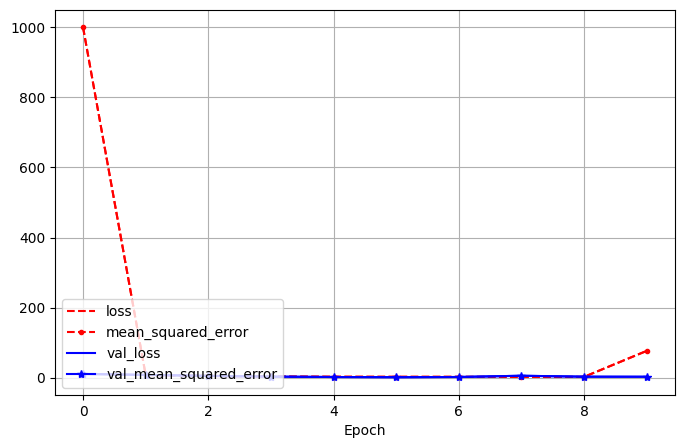

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5),grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 1.5898 - mean_squared_error: 1.5898


[1.58979070186615, 1.58979070186615]

In [ ]:
n=5
test_sample = X_test[n]
predictions = model.predict(test_sample)
predictions

1/1 [==============================] - 0s 103ms/step


array([[0.65048546]], dtype=float32)

In [ ]:
y_test[n]

1.587